<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/Suicide_Rate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Suicide Data : EDA

<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
print("All necessary packages included successfully!")

All necessary packages included successfully!


In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Suicide%20data.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
r,c = df.shape
print("Number of rows in the dataset    = ",r)
print("Number of columns in the dataset = ",c)

Number of rows in the dataset    =  27820
Number of columns in the dataset =  12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
print("Are there any missing values in the dataset ?",df.isnull().values.any())

Are there any missing values in the dataset ? True


In [6]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
df = df.drop(columns=['HDI for year','country-year'])
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [8]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


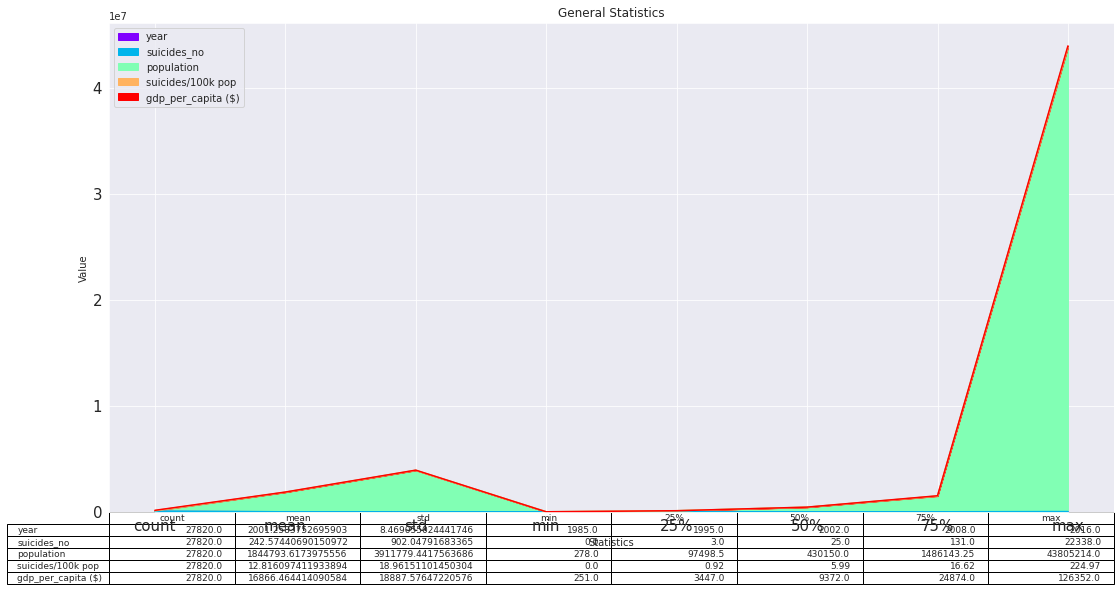

In [22]:
df.describe().plot(kind = "area",fontsize=15, figsize = (18,9), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics")
plt.show()


Text(0.5, 1.0, 'Spearman correlation matrix for parametes\n')

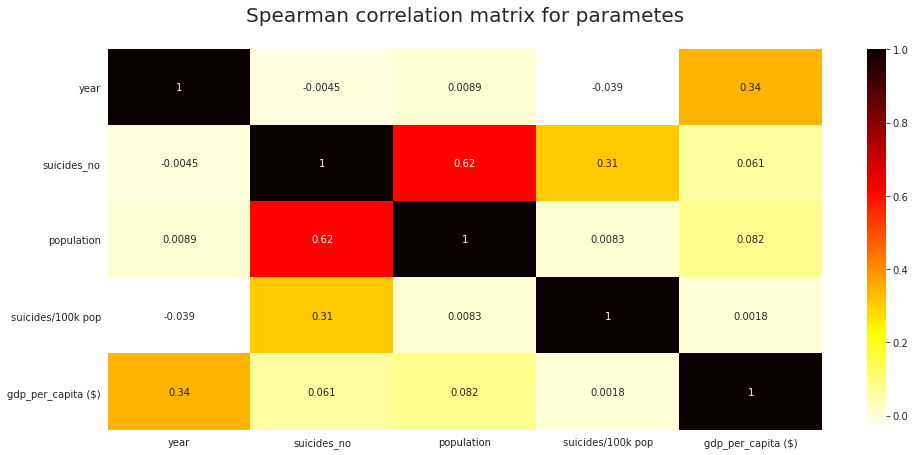

In [9]:
plt.figure(figsize=(16,7))
cor = sns.heatmap(df.corr(), annot = True,cmap='hot_r')
plt.title("Spearman correlation matrix for parametes\n",size=20)

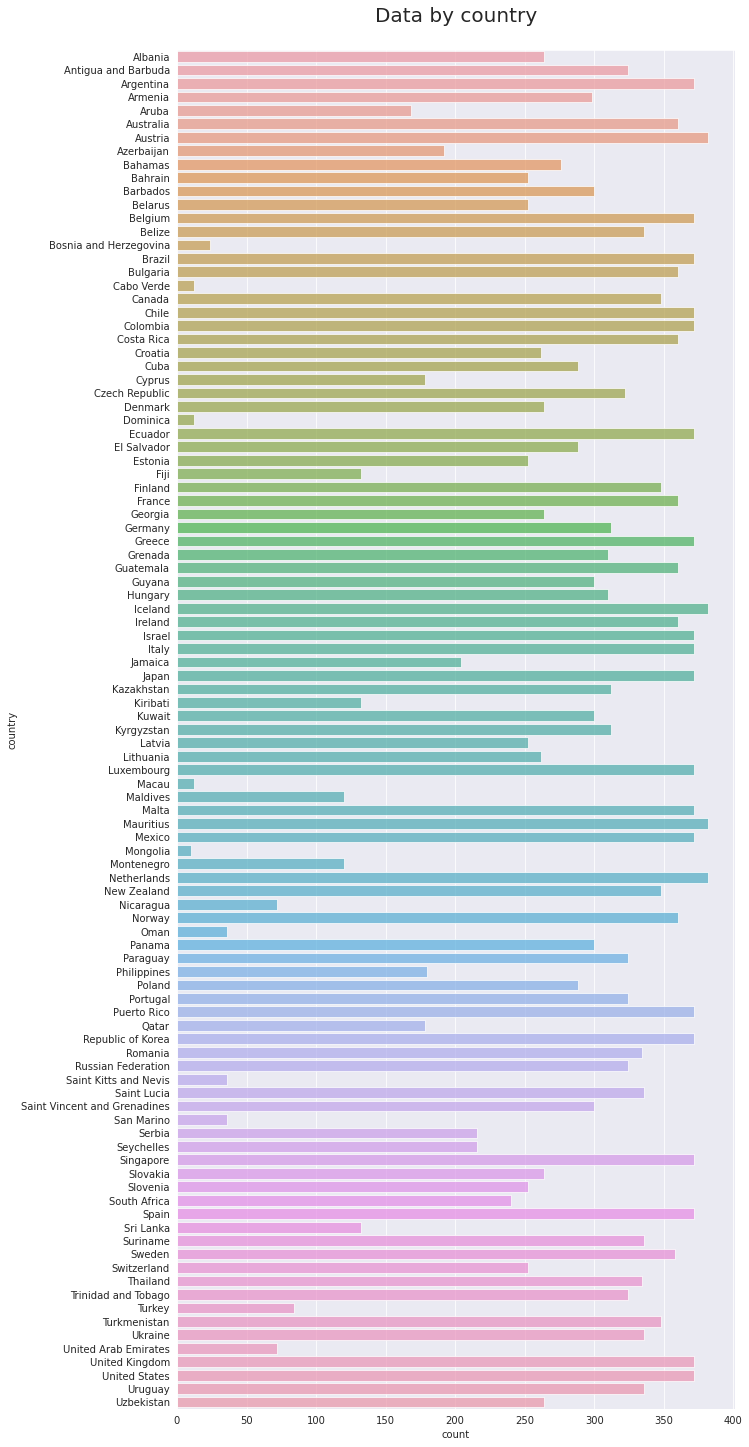

In [10]:
alpha = 0.7
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=df, alpha=alpha)
plt.title('Data by country\n',size=20)
plt.show()

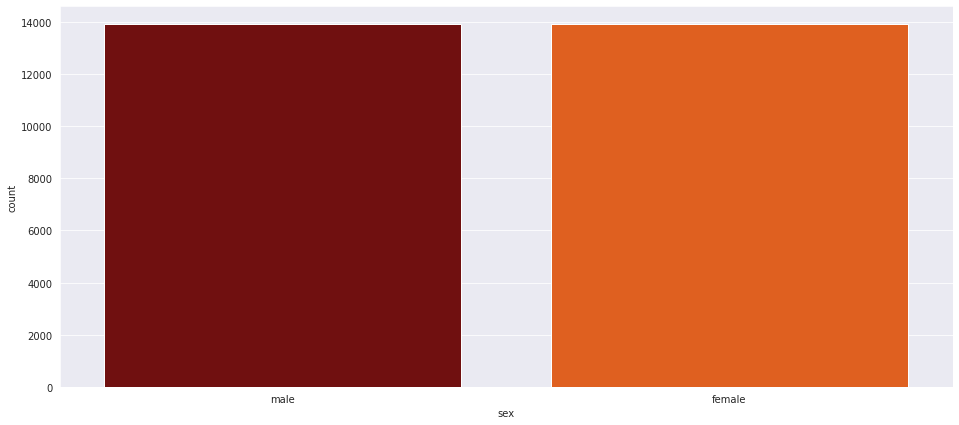

In [18]:
plt.figure(figsize=(16,7))
##Plot the graph
sex = sns.countplot(x='sex',data = df,palette='gist_heat')

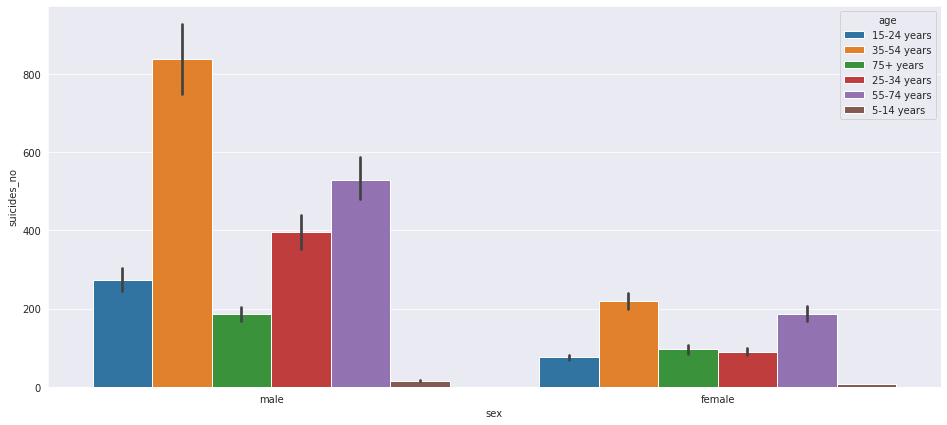

In [12]:
plt.figure(figsize=(16,7))
###Let's plot the barplot
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = df)

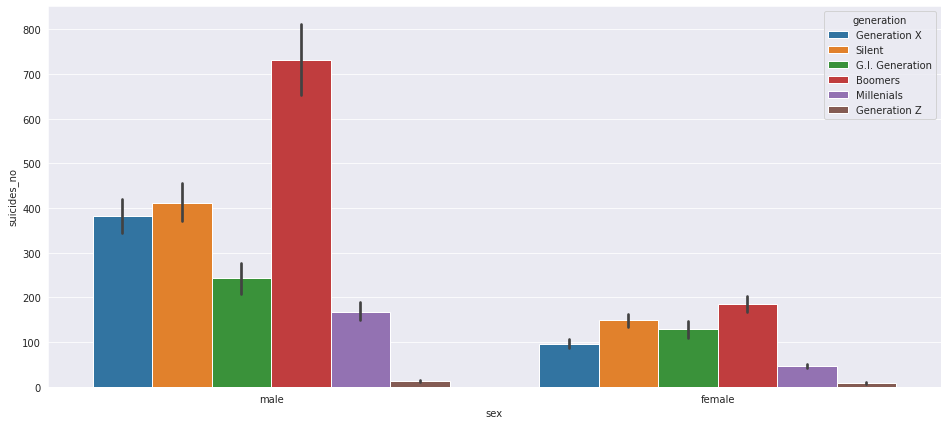

In [13]:
plt.figure(figsize=(16,7))
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = df)

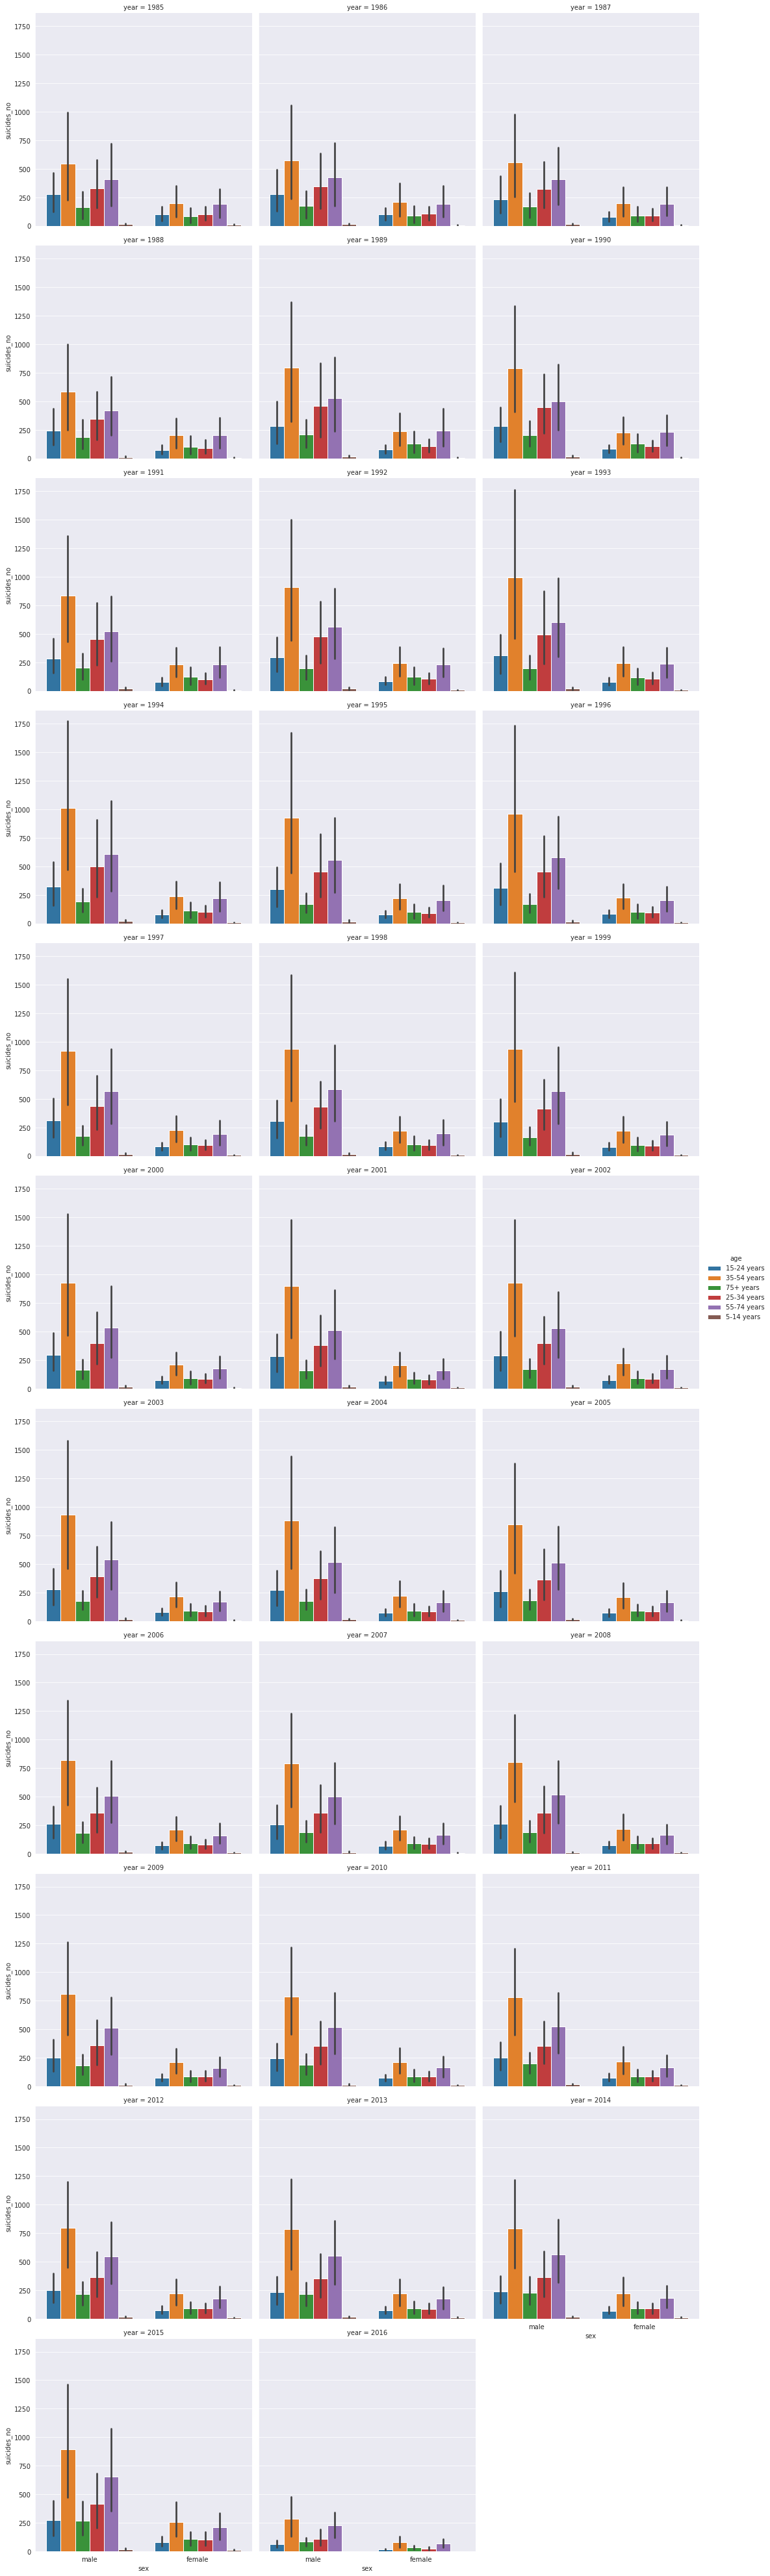

In [14]:
cat_accord_year = sns.catplot(x='sex',y='suicides_no',hue='age',col='year',data=df,kind='bar',col_wrap=3)

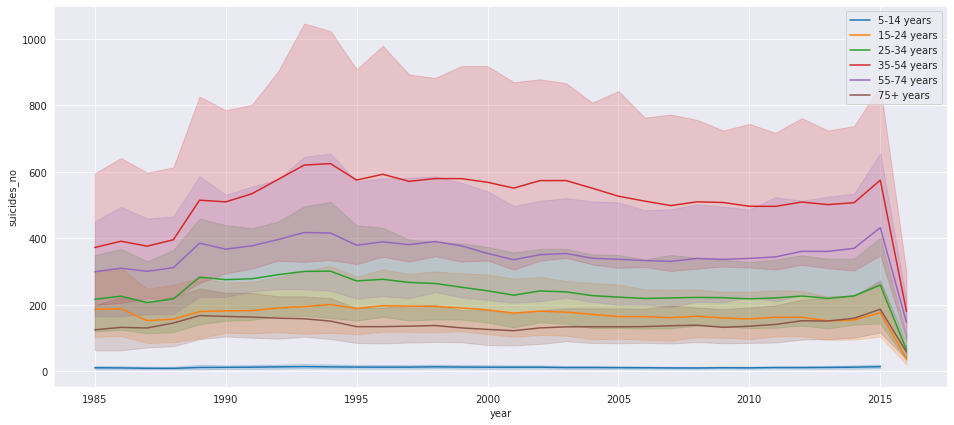

In [15]:
age_5 = df.loc[df.loc[:, 'age']=='5-14 years',:]
age_15 = df.loc[df.loc[:, 'age']=='15-24 years',:]
age_25 = df.loc[df.loc[:, 'age']=='25-34 years',:]
age_35 = df.loc[df.loc[:, 'age']=='35-54 years',:]
age_55 = df.loc[df.loc[:, 'age']=='55-74 years',:]
age_75 = df.loc[df.loc[:, 'age']=='75+ years',:]

### Set figure size
plt.figure(figsize=(16,7))
####Now lets plot a line plot
age_5_lp = sns.lineplot(x='year', y='suicides_no', data=age_5)
age_15_lp = sns.lineplot(x='year', y='suicides_no', data=age_15)
age_25_lp = sns.lineplot(x='year', y='suicides_no', data=age_25)
age_35_lp = sns.lineplot(x='year', y='suicides_no', data=age_35)
age_55_lp = sns.lineplot(x='year', y='suicides_no', data=age_55)
age_75_lp = sns.lineplot(x='year', y='suicides_no', data=age_75)

##Now make the legend
leg = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

In [16]:
df['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

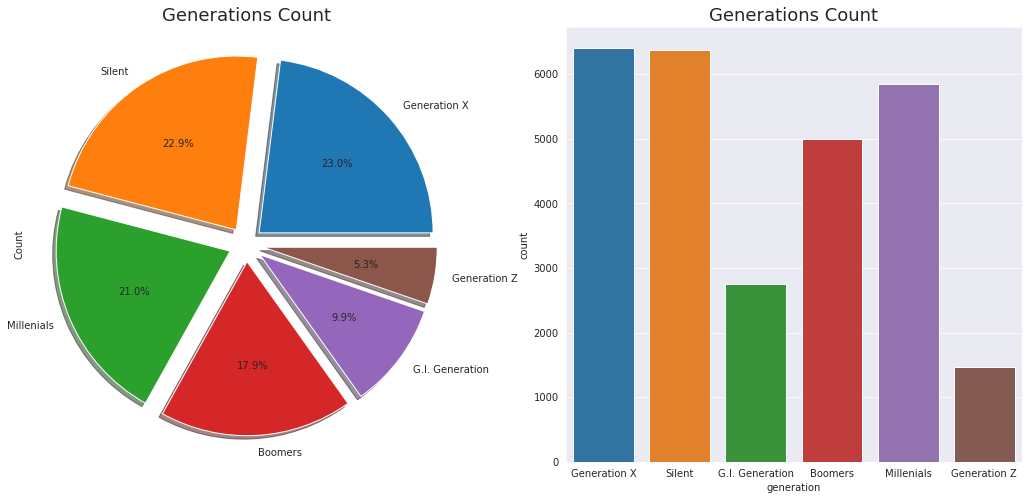

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Generations Count',size=18)
ax[0].set_ylabel('Count')
sns.countplot(x='generation',data=df,ax=ax[1])
ax[1].set_title('Generations Count',size=18)
plt.show()

<Figure size 1440x1440 with 0 Axes>

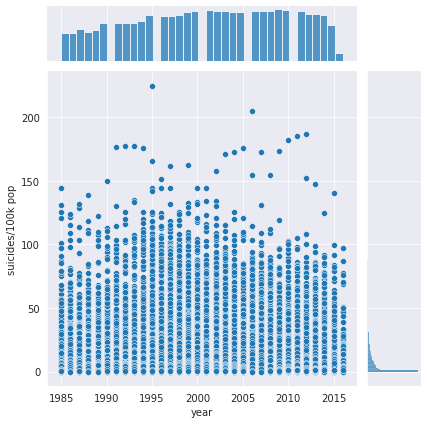

In [38]:
plt.figure(figsize=(20,20))
fig=sns.jointplot(y='suicides/100k pop',x='year',data=df)
plt.show()

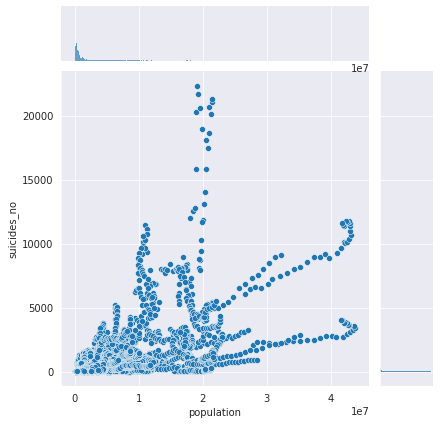

In [40]:
fig=sns.jointplot(y='suicides_no',x='population',data=df)
plt.show()

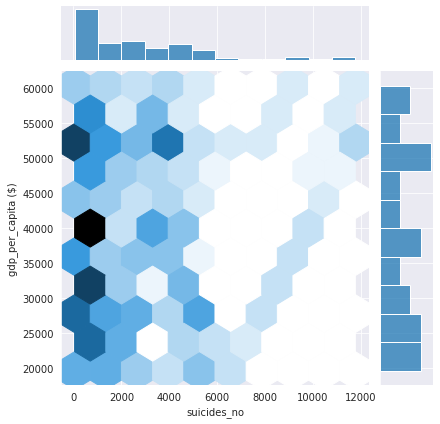

In [43]:
fig=sns.jointplot(y='gdp_per_capita ($)',x='suicides_no',kind='hex',data=df[df['country']=='United States'])
plt.show()

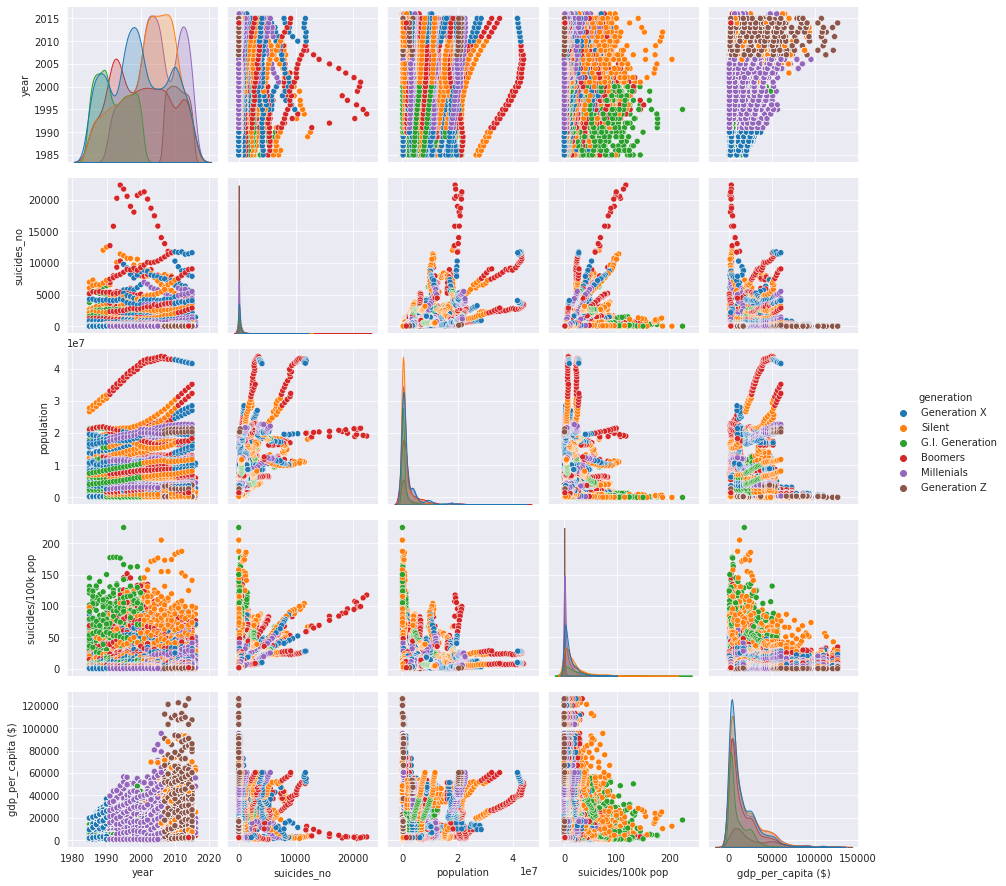

In [45]:
sns.pairplot(df,hue='generation')
plt.show()